#Tag Check

In [2]:
#Color Coding
IF [Column] <  (WINDOW_AVG([Column]) - WINDOW_STDEV([Column])) THEN 'Bad Anomaly'
ELSEIF [Column] > (WINDOW_AVG([Column]) + WINDOW_STDEV([Column])) THEN 'Good Anomaly'
ELSE 'Expected'
END

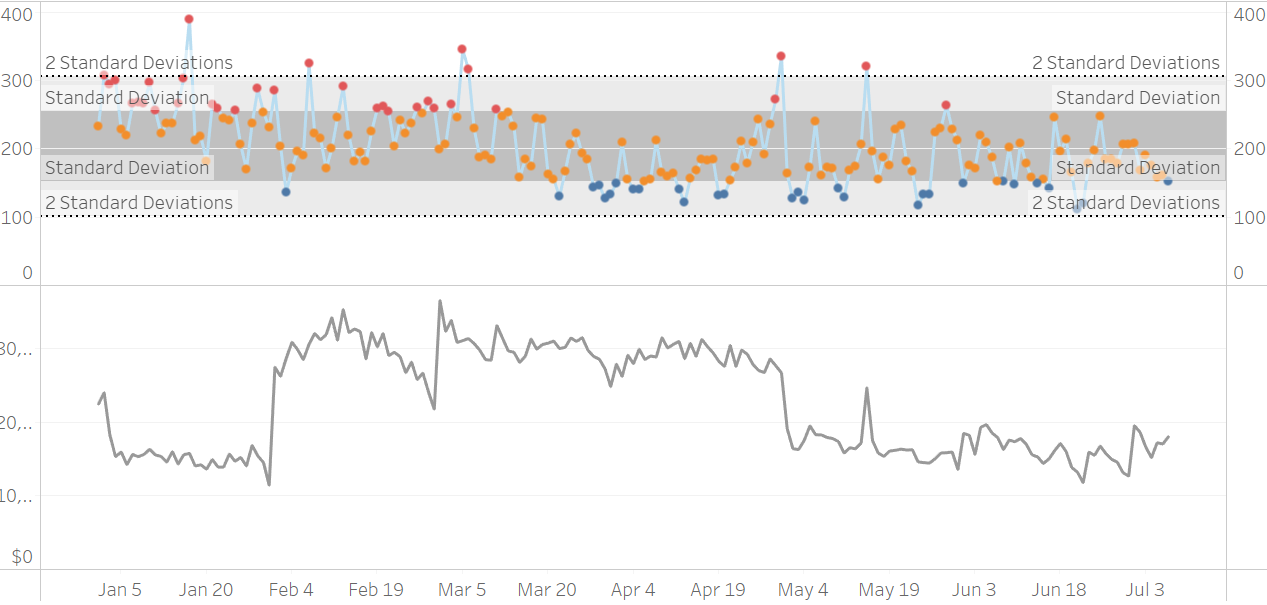

# Incrementality Calculator

In [ ]:
IF ISNULL(SUM([Column])) THEN
    NULL
ELSE
    SUM([Spend]) / (
        SUM(
            IIF(
                [Appendix Channels] = 'Programmatic Display' OR [Appendix Channels] = 'Site Direct Display', 0.1,
                IIF(
                    [Appendix Channels] = 'Meta Retargeting' OR [Appendix Channels] = 'Snapchat Retargeting', 0.01,
                    IIF(
                        [Appendix Channels] = 'Meta Prospecting' OR [Appendix Channels] = 'Snapchat Prospecting', 0.08,
                        IIF(
                            [Appendix Channels] = 'Search Branded AO' OR [Appendix Channels] = 'Search Branded Sale' OR [Appendix Channels] = 'Search Branded', 0.25,
                            IIF(
                                [Appendix Channels] = 'Search Nonbranded' OR [Appendix Channels] = 'Search Discovery' OR [Appendix Channels] = 'Demand Gen', 0.8,
                                NULL
                            )
                        )
                    )
                )
            ) * [Column]
        )
    )
END

# WoW Graph Color Change

In [ ]:
IF [Column] <= 18.14 THEN "Green"
ELSEIF [Column] > 18.14 AND [Column] < LOOKUP([Column], -1) THEN "Yellow"
ELSE "Red"
END

# % Diff MoM

In [ ]:
(SUM([Column]) - LOOKUP(SUM([Column]), -1)) / LOOKUP(SUM([Column]), -1)

#Moving Average

In [ ]:
WINDOW_AVG([Column], 0, 13)

In [ ]:
([Column] - [Moving CPAA Average]) / [Moving CPAA Average] #%diff moving average